## **Customer Segmentation**

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### **Data Preprocessing**

In [2]:
customer_df = pd.read_csv("/content/Mall_Customers.csv")
customer_df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
customer_df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [4]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
X = customer_df[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Elbow Method**

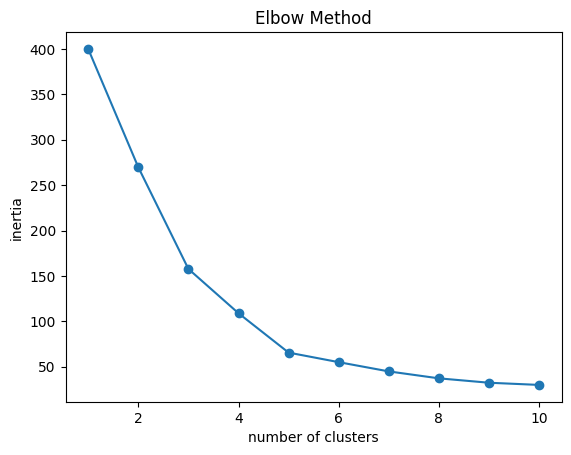

In [7]:
inertia = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, random_state = 42, n_init=10)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia, marker = 'o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')
plt.title('Elbow Method')
plt.show()

### **K-Means**

In [8]:
kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
customer_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
cluster_ranges = customer_df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].agg(['min','max'])
print(cluster_ranges)


        Annual Income (k$)      Spending Score (1-100)    
                       min  max                    min max
Cluster                                                   
0                       39   76                     34  61
1                       69  137                     63  97
2                       15   39                     61  99
3                       70  137                      1  39
4                       15   39                      3  40


In [10]:
# Give clusters human-friendly names
labels_map = {
    0: "Average Income - Average Spending",
    1: "High Income - High Spending",
    2: "Low Income - High Spending",
    3: "High Income - Low Spending",
    4: "Low Income - Low Spending"
}
customer_df['Cluster_Label'] = customer_df['Cluster'].map(labels_map)


/tmp/ipython-input-55712595.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=labels_map[cluster], s=50, cmap = 'rainbow')


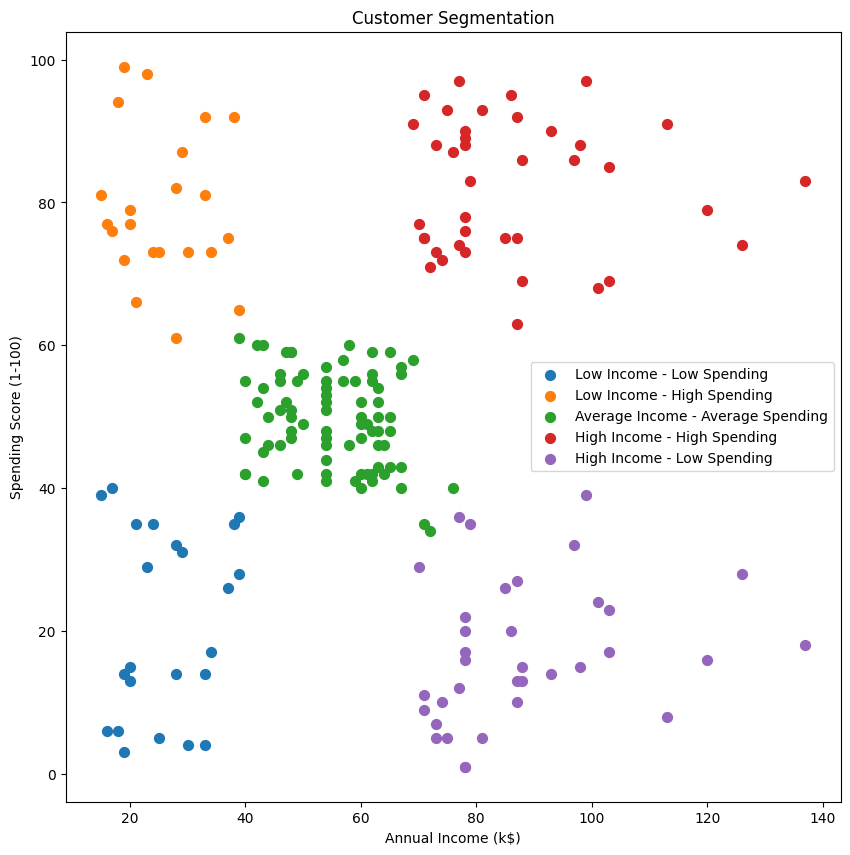

In [11]:
plt.figure(figsize=(10,10))
for cluster in customer_df['Cluster'].unique():
    cluster_data = customer_df[customer_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'], label=labels_map[cluster], s=50, cmap = 'rainbow')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### **DBSCAN**

Cluster counts (DBSCAN):
DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64


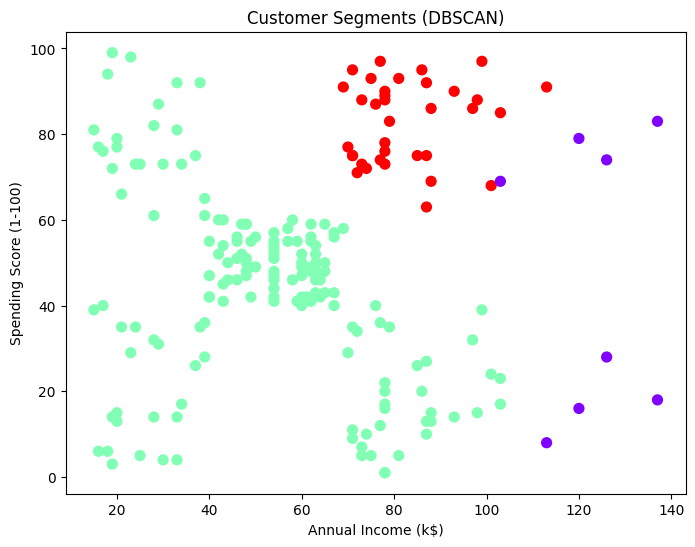

In [12]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN on scaled data
dbscan = DBSCAN(eps=0.5, min_samples=5)   # tune eps if needed
db_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN cluster labels to DataFrame
customer_df['DBSCAN_Cluster'] = db_labels

# Show cluster counts
print("Cluster counts (DBSCAN):")
print(customer_df['DBSCAN_Cluster'].value_counts())

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
plt.scatter(customer_df['Annual Income (k$)'], customer_df['Spending Score (1-100)'],
            c=customer_df['DBSCAN_Cluster'], cmap='rainbow', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (DBSCAN)')
plt.show()


### **Average spending per cluster**

In [13]:
# Average spending per cluster (KMeans)
avg_spending_kmeans = customer_df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending per Cluster (KMeans):\n", avg_spending_kmeans)

# Average spending per cluster (DBSCAN) -- ignore noise (-1)
avg_spending_dbscan = customer_df[customer_df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending per Cluster (DBSCAN):\n", avg_spending_dbscan)

Average Spending per Cluster (KMeans):
 Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64

Average Spending per Cluster (DBSCAN):
 DBSCAN_Cluster
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64
